# 📊 PhonePe Digital Payments Case Study

This case study analyzes transaction and demographic data from PhonePe across Indian states and districts. The aim is to explore trends in transaction behavior, device usage, and demographics using Python.

## 🔍 Task 1: Data Loading and Understanding

In this task, we will:
- Load and inspect each dataset
- Display row samples
- View statistics, datatypes, and missing values
- Summarize key structural insights


In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
file_path = "C:/Users/saner/Downloads/phonepe-data.xlsx"

In [67]:
state_txn_users = pd.read_excel(file_path, sheet_name = 'State_Txn and Users')
state_txn_split = pd.read_excel(file_path, sheet_name='State_TxnSplit')
state_device_data = pd.read_excel(file_path, sheet_name='State_DeviceData')
district_txn_users = pd.read_excel(file_path, sheet_name='District_Txn and Users')
district_demographics = pd.read_excel(file_path, sheet_name='District Demographics')

In [68]:
# First 5 rows of State_Txn and Users
print("First 5 rows of State_Txn and Users")
state_txn_users.head()

First 5 rows of State_Txn and Users


,State,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,6658,1.463176e+07,2197.621091,6740,0
1,Andaman & Nicobar Islands,2018,2,11340,2.833854e+07,2498.989022,9405,0
2,Andaman & Nicobar Islands,2018,3,16265,5.555747e+07,3415.768284,12149,0
3,Andaman & Nicobar Islands,2018,4,23758,9.054834e+07,3811.277720,15222,0
4,Andaman & Nicobar Islands,2019,1,30486,1.022997e+08,3355.630147,18596,0


In [69]:
# Last 10 rows of State_TxnSplit
print("Last 10 rows of State_TxnSplit")
state_txn_split.tail(10)

Last 10 rows of State_TxnSplit


,State,Year,Quarter,Transaction Type,Transactions,Amount (INR),ATV (INR)
2504,West Bengal,2021,1,Peer-to-peer payments,53869075,2.022402e+11,3754.292226
2505,West Bengal,2021,1,Merchant payments,37143701,2.891834e+10,778.553104
2506,West Bengal,2021,1,Recharge & bill payments,26673733,1.133967e+10,425.124820
2507,West Bengal,2021,1,Financial Services,166727,1.754458e+08,1052.293941
2508,West Bengal,2021,1,Others,400816,2.635025e+08,657.415236
2509,West Bengal,2021,2,Peer-to-peer payments,64661051,2.308123e+11,3569.572026
2510,West Bengal,2021,2,Merchant payments,41696787,3.478787e+10,834.305703
2511,West Bengal,2021,2,Recharge & bill payments,34799709,1.333145e+10,383.090958
2512,West Bengal,2021,2,Financial Services,190537,1.864665e+08,978.636630
2513,West Bengal,2021,2,Others,549353,3.167447e+08,576.577748


In [70]:
# 10 rows from the middle of State_DeviceData
middle_index = len(state_device_data) // 2
print("10 middle rows of State_DeviceData")
display(state_device_data.iloc[middle_index-5:middle_index+5])

10 middle rows of State_DeviceData


,State,Year,Quarter,Brand,Registered Users,Percentage
2767,Ladakh,2021,2,OnePlus,1741,0.023198
2768,Ladakh,2021,2,Motorola,922,0.012285
2769,Ladakh,2021,2,Huawei,894,0.011912
2770,Ladakh,2021,2,Lenovo,490,0.006529
2771,Ladakh,2021,2,Others,2610,0.034778
2772,Lakshadweep,2018,1,Samsung,102,0.203593
2773,Lakshadweep,2018,1,Xiaomi,100,0.199601
2774,Lakshadweep,2018,1,Vivo,67,0.133733
2775,Lakshadweep,2018,1,Oppo,56,0.111776
2776,Lakshadweep,2018,1,Huawei,25,0.049900


In [71]:
# First 10 and Last 10 rows of District_Txn and Users
print("First 10 rows of District_Txn and Users")
display(district_txn_users.head(10))
print("Last 10 rows of District_Txn and Users")
display(district_txn_users.tail(10))

First 10 rows of District_Txn and Users


,State,Year,Quarter,District,Code,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,Nicobars,AN01,528,1.139849e+06,2158.804548,262,0
1,Andaman & Nicobar Islands,2018,1,North And Middle Andaman,AN02,442,9.316631e+05,2107.835016,632,0
2,Andaman & Nicobar Islands,2018,1,South Andaman,AN03,5688,1.256025e+07,2208.201361,5846,0
3,Andaman & Nicobar Islands,2018,2,Nicobars,AN01,1120,3.072437e+06,2743.247239,351,0
4,Andaman & Nicobar Islands,2018,2,North And Middle Andaman,AN02,825,1.317863e+06,1597.409798,911,0
5,Andaman & Nicobar Islands,2018,2,South Andaman,AN03,9395,2.394824e+07,2549.040502,8143,0
6,Andaman & Nicobar Islands,2018,3,Nicobars,AN01,1471,6.387829e+06,4342.507921,467,0
7,Andaman & Nicobar Islands,2018,3,North And Middle Andaman,AN02,1283,4.901530e+06,3820.365954,1208,0
8,Andaman & Nicobar Islands,2018,3,South Andaman,AN03,13511,4.426811e+07,3276.449742,10474,0
9,Andaman & Nicobar Islands,2018,4,Nicobars,AN01,1485,7.180859e+06,4835.595525,536,0


Last 10 rows of District_Txn and Users


,State,Year,Quarter,District,Code,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
10238,West Bengal,2021,2,Murshidabad,WB14,8602251,1.999694e+10,2324.616616,1248602,16530655
10239,West Bengal,2021,2,Nadia,WB15,5524174,1.122758e+10,2032.445525,955428,13665885
10240,West Bengal,2021,2,North Twenty Four Parganas,WB16,17258291,3.041482e+10,1762.331031,2660664,37899453
10241,West Bengal,2021,2,Paschim Bardhaman,WB17,4893774,8.731263e+09,1784.157359,789026,10545670
10242,West Bengal,2021,2,Paschim Medinipur,WB18,5051834,1.030351e+10,2039.558976,856640,16201033
10243,West Bengal,2021,2,Purba Bardhaman,WB19,3920729,7.572502e+09,1931.401639,787970,12128849
10244,West Bengal,2021,2,Purba Medinipur,WB20,6418522,1.515507e+10,2361.146027,946277,15491958
10245,West Bengal,2021,2,Purulia,WB21,1895981,2.790996e+09,1472.059252,435131,8843358
10246,West Bengal,2021,2,South Twenty Four Parganas,WB22,6661813,1.339853e+10,2011.243709,1286588,19344293
10247,West Bengal,2021,2,Uttar Dinajpur,WB23,2253385,5.564221e+09,2469.272118,392388,8184990


In [72]:
# Every 10th row of District Demographics
print("Every 10th row of District Demographics")
display(district_demographics.iloc[::10])

Every 10th row of District Demographics


,State,District,Headquarters,Population,Area (sq km),Density,Code,Alternate Name
0,Andhra Pradesh,Anantapur,Anantapur,4083315,19130.0,213,AP01,Anantapur
10,Andhra Pradesh,Visakhapatnam,Visakhapatnam,4288113,11161.0,384,AP10,Visakhapatnam
20,Arunachal Pradesh,Lepa Rada,Basar,0,0.0,0,AR08,Lepa Rada
30,Arunachal Pradesh,Siang,Pangin,31920,2919.0,11,AR18,Siang
40,Assam,Barpeta,Barpeta,1693622,3245.0,520,AS03,Barpeta
...,...,...,...,...,...,...,...,...
700,Chandigarh,Chandigarh,Chandigarh,1055450,114.0,9258,CH01,Chandigarh
710,Jammu & Kashmir,Jammu,Jammu,1526406,3097.0,596,JK07,Jammu
720,Jammu & Kashmir,Samba,Samba,318611,913.0,318,JK17,Samba
730,Delhi,North Delhi,Sadar Bazaar,887978,59.0,14557,DL04,North


#  Display basic statistics and data types for each dataset

In [74]:
# Summary statistics for each dataset
print("State_Txn and Users - Summary Stats")
print(state_txn_users.describe(), "\n")

print("State_TxnSplit - Summary Stats")
print(state_txn_split.describe(), "\n")

print("State_DeviceData - Summary Stats")
print(state_device_data.describe(), "\n")

print("District_Txn and Users - Summary Stats")
print(district_txn_users.describe(), "\n")

print("District Demographics - Summary Stats")
print(district_demographics.describe(), "\n")


State_Txn and Users - Summary Stats
              Year     Quarter  Transactions  Amount (INR)    ATV (INR)  \
count   504.000000  504.000000  5.040000e+02  5.030000e+02   504.000000   
mean   2019.285714    2.357143  4.074000e+07  7.083332e+10  1993.471543   
std       1.031181    1.109971  8.228714e+07  1.440902e+11   607.464894   
min    2018.000000    1.000000  7.780000e+02  1.928611e+06     0.000000   
25%    2018.000000    1.000000  5.925578e+05  1.167157e+09  1598.910667   
50%    2019.000000    2.000000  6.217487e+06  1.051605e+10  1861.380589   
75%    2020.000000    3.000000  4.363675e+07  6.947045e+10  2259.087924   
max    2021.000000    4.000000  5.736165e+08  1.027958e+12  3938.733850   

       Registered Users     App Opens  
count      5.040000e+02  5.040000e+02  
mean       4.777501e+06  9.774471e+07  
std        6.644496e+06  2.042376e+08  
min        5.010000e+02  0.000000e+00  
25%        1.574202e+05  0.000000e+00  
50%        1.747914e+06  2.930574e+06  
75%     

In [75]:
# Data types of each dataset
print("State_Txn and Users - Data Types")
print(state_txn_users.dtypes, "\n")

print("State_TxnSplit - Data Types")
print(state_txn_split.dtypes, "\n")

print("State_DeviceData - Data Types")
print(state_device_data.dtypes, "\n")

print("District_Txn and Users - Data Types")
print(district_txn_users.dtypes, "\n")

print("District Demographics - Data Types")
print(district_demographics.dtypes, "\n")

State_Txn and Users - Data Types
State                object
Year                  int64
Quarter               int64
Transactions          int64
Amount (INR)        float64
ATV (INR)           float64
Registered Users      int64
App Opens             int64
dtype: object 

State_TxnSplit - Data Types
State                object
Year                  int64
Quarter               int64
Transaction Type     object
Transactions          int64
Amount (INR)        float64
ATV (INR)           float64
dtype: object 

State_DeviceData - Data Types
State                object
Year                  int64
Quarter               int64
Brand                object
Registered Users      int64
Percentage          float64
dtype: object 

District_Txn and Users - Data Types
State                object
Year                  int64
Quarter               int64
District             object
Code                 object
Transactions          int64
Amount (INR)        float64
ATV (INR)           float64
Registered Us

# Missing Value Analysis

In [77]:
# Check for missing values
print("Missing values in State_Txn and Users:")
print(state_txn_users.isnull().sum(), "\n")

print("Missing values in State_TxnSplit:")
print(state_txn_split.isnull().sum(), "\n")

print("Missing values in State_DeviceData:")
print(state_device_data.isnull().sum(), "\n")

print("Missing values in District_Txn and Users:")
print(district_txn_users.isnull().sum(), "\n")

print("Missing values in District_Demographics:")
print(district_demographics.isnull().sum(), "\n")

Missing values in State_Txn and Users:
State               0
Year                0
Quarter             0
Transactions        0
Amount (INR)        1
ATV (INR)           0
Registered Users    0
App Opens           0
dtype: int64 

Missing values in State_TxnSplit:
State               0
Year                0
Quarter             0
Transaction Type    0
Transactions        0
Amount (INR)        0
ATV (INR)           0
dtype: int64 

Missing values in State_DeviceData:
State               0
Year                0
Quarter             0
Brand               0
Registered Users    0
Percentage          0
dtype: int64 

Missing values in District_Txn and Users:
State                0
Year                 0
Quarter              0
District             0
Code                28
Transactions         0
Amount (INR)         0
ATV (INR)            4
Registered Users     0
App Opens            0
dtype: int64 

Missing values in District_Demographics:
State             0
District          0
Headquarters    

In [78]:
# Calculate the percentage of missing values
def missing_percentage(df):
    return (df.isnull().sum() / len(df)) * 100

print("Percentage of missing values in State_Txn and Users:")
print(missing_percentage(state_txn_users), "\n")

print("Percentage of missing values in State_TxnSplit:")
print(missing_percentage(state_txn_split), "\n")

print("Percentage of missing values in State_DeviceData:")
print(missing_percentage(state_device_data), "\n")

print("Percentage of missing values in District_Txn and Users:")
print(missing_percentage(district_txn_users), "\n")

print("Percentage of missing values in District_Demographics:")
print(missing_percentage(district_demographics), "\n")

Percentage of missing values in State_Txn and Users:
State               0.000000
Year                0.000000
Quarter             0.000000
Transactions        0.000000
Amount (INR)        0.198413
ATV (INR)           0.000000
Registered Users    0.000000
App Opens           0.000000
dtype: float64 

Percentage of missing values in State_TxnSplit:
State               0.0
Year                0.0
Quarter             0.0
Transaction Type    0.0
Transactions        0.0
Amount (INR)        0.0
ATV (INR)           0.0
dtype: float64 

Percentage of missing values in State_DeviceData:
State               0.0
Year                0.0
Quarter             0.0
Brand               0.0
Registered Users    0.0
Percentage          0.0
dtype: float64 

Percentage of missing values in District_Txn and Users:
State               0.000000
Year                0.000000
Quarter             0.000000
District            0.000000
Code                0.273224
Transactions        0.000000
Amount (INR)        0.00

In [79]:
# Find column with highest missing percentage
def column_with_max_missing(df):
    percent = missing_percentage(df)
    return percent.idxmax(), percent.max()

print("Max missing column in State_Txn and Users:", column_with_max_missing(state_txn_users))
print("Max missing column in State_TxnSplit:", column_with_max_missing(state_txn_split))
print("Max missing column in State_DeviceData:", column_with_max_missing(state_device_data))
print("Max missing column in District_Txn and Users:", column_with_max_missing(district_txn_users))
print("Max missing column in District_Demographics:", column_with_max_missing(district_demographics))


Max missing column in State_Txn and Users: ('Amount (INR)', 0.1984126984126984)
Max missing column in State_TxnSplit: ('State', 0.0)
Max missing column in State_DeviceData: ('State', 0.0)
Max missing column in District_Txn and Users: ('Code', 0.273224043715847)
Max missing column in District_Demographics: ('State', 0.0)


# Create a Summary

In [81]:
# Calculate the total number of unique states and districts
# 1. Total number of unique states
num_states = district_demographics['State'].nunique()
print(f"Total number of states: {num_states}")

# 2. Total number of unique districts
num_districts = district_demographics['District'].nunique()
print(f"Total number of districts: {num_districts}")

Total number of states: 36
Total number of districts: 736


In [82]:
# 3. State with the highest number of districts
district_count_per_state = district_demographics['State'].value_counts()
state_with_max_districts = district_count_per_state.idxmax()
max_districts = district_count_per_state.max()

print(f"State with the highest number of districts: {state_with_max_districts} ({max_districts} districts)")

State with the highest number of districts: Uttar Pradesh (75 districts)


# Data Cleaning and Preparation

In [84]:
# Remove leading/trailing spaces from column names in all datasets
state_txn_users.columns = state_txn_users.columns.str.strip()
state_txn_split.columns = state_txn_split.columns.str.strip()
state_device_data.columns = state_device_data.columns.str.strip()
district_txn_users.columns = district_txn_users.columns.str.strip()
district_demographics.columns = district_demographics.columns.str.strip()

# Check and remove duplicate rows from each dataset
# List of DataFrames and their names
dataframes = [state_txn_users, state_txn_split, state_device_data, district_txn_users, district_demographics]
names = ["State_Txn and Users", "State_TxnSplit", "State_DeviceData", "District_Txn and Users", "District Demographics"]

# Iterate over the DataFrames and their corresponding names
for i in range(len(dataframes)):
    df = dataframes[i]
    name = names[i]
    
    duplicates = df.duplicated().sum()
    print(f"{name}: {duplicates} duplicate rows")
    df.drop_duplicates(inplace=True)

State_Txn and Users: 0 duplicate rows
State_TxnSplit: 0 duplicate rows
State_DeviceData: 0 duplicate rows
District_Txn and Users: 0 duplicate rows
District Demographics: 0 duplicate rows


# 🔍 Task 2: Exploratory Data Analysis (EDA)

# Analyze Transaction Trends Over the Years for Each State

In [87]:
# Group by state and year, summing the transactions and total amount
state_transaction_trends = state_txn_users.groupby(['State', 'Year'])[['Transactions', 'Amount (INR)']].sum().reset_index()

# Display the results
print(state_transaction_trends)

                         State  Year  Transactions  Amount (INR)
0    Andaman & Nicobar Islands  2018         58021  1.890761e+08
1    Andaman & Nicobar Islands  2019        133104  4.734648e+08
2    Andaman & Nicobar Islands  2020        446274  1.296423e+09
3    Andaman & Nicobar Islands  2021        586166  1.682854e+09
4               Andhra Pradesh  2018      77779112  1.220720e+11
..                         ...   ...           ...           ...
139                Uttarakhand  2021      44608834  7.727901e+10
140                West Bengal  2018     120011635  1.115887e+11
141                West Bengal  2019     257900590  2.660145e+11
142                West Bengal  2020     304222327  5.527316e+11
143                West Bengal  2021     260151489  5.223720e+11

[144 rows x 4 columns]


In [88]:
# Identify the Top 5 States with the Highest Transaction Volumes and the Top 5 States with the Lowest Transaction Volumes
# Sort by transactions in descending order and select the top 5 states
top_5_states = state_transaction_trends.sort_values('Transactions', ascending=False).head(5)
print("Top 5 States with Highest Transaction Volumes:")
print(top_5_states)

# Sort by transactions in ascending order and select the bottom 5 states
bottom_5_states = state_transaction_trends.sort_values('Transactions', ascending=True).head(5)
print("Top 5 States with Lowest Transaction Volumes:")
print(bottom_5_states)

Top 5 States with Highest Transaction Volumes:
           State  Year  Transactions  Amount (INR)
62     Karnataka  2020    1216153117  1.803284e+12
82   Maharashtra  2020    1099666770  1.678817e+12
83   Maharashtra  2021    1091476726  1.685002e+12
63     Karnataka  2021    1054446538  1.592883e+12
126    Telangana  2020     931480581  1.895187e+12
Top 5 States with Lowest Transaction Volumes:
                        State  Year  Transactions  Amount (INR)
72                Lakshadweep  2018          6255  1.691867e+07
73                Lakshadweep  2019         12276  3.895033e+07
75                Lakshadweep  2021         20469  5.442625e+07
74                Lakshadweep  2020         32610  8.186344e+07
0   Andaman & Nicobar Islands  2018         58021  1.890761e+08


# Identify the Most Common Transaction Types in Each State and Quarter

In [90]:
# Count frequency (number of times) each transaction type appears per state and quarter
txn_type_freq = state_txn_split.groupby(['State', 'Quarter', 'Transaction Type']).size().reset_index(name='Txn_Count')

# Find the most common transaction type for each state and quarter
most_common_txn_types = txn_type_freq.loc[txn_type_freq.groupby(['State', 'Quarter'])['Txn_Count'].idxmax()]

print(most_common_txn_types)

                         State  Quarter    Transaction Type  Txn_Count
0    Andaman & Nicobar Islands        1  Financial Services          4
5    Andaman & Nicobar Islands        2  Financial Services          4
10   Andaman & Nicobar Islands        3  Financial Services          3
15   Andaman & Nicobar Islands        4  Financial Services          3
20              Andhra Pradesh        1  Financial Services          4
..                         ...      ...                 ...        ...
695                Uttarakhand        4  Financial Services          3
700                West Bengal        1  Financial Services          4
705                West Bengal        2  Financial Services          4
710                West Bengal        3  Financial Services          3
715                West Bengal        4  Financial Services          3

[144 rows x 4 columns]


# Determine the Device Brand with the Highest Number of Registered Users in Each State

In [92]:
### Group by state and brand, summing the registered users
device_brand_usage = state_device_data.groupby(['State', 'Brand'])['Registered Users'].sum().reset_index()

# Find the device brand with the highest number of registered users for each state
max_device_brand = device_brand_usage.loc[device_brand_usage.groupby('State')['Registered Users'].idxmax()]
print(max_device_brand)

                                    State    Brand  Registered Users
11              Andaman & Nicobar Islands   Xiaomi             97889
22                         Andhra Pradesh   Xiaomi          40061549
34                      Arunachal Pradesh   Xiaomi            437803
46                                  Assam   Xiaomi           6979357
60                                  Bihar   Xiaomi          33721314
73                             Chandigarh   Xiaomi            896628
85                           Chhattisgarh   Xiaomi           8763373
98   Dadra & Nagar Haveli and Daman & Diu   Xiaomi            638834
109                                 Delhi   Xiaomi          24114984
120                                   Goa   Xiaomi           1208672
131                               Gujarat   Xiaomi          28942157
143                               Haryana   Xiaomi          21102142
156                      Himachal Pradesh   Xiaomi           3978888
168                       Jammu & 

#  Create a List of the Top District per State Based on Population

In [94]:
# Group by state and district, and find the district with the highest population
top_district_by_population = district_demographics.groupby(['State', 'District'])['Population'].max().reset_index()

# For each state, get the district with the highest population
top_district_per_state = top_district_by_population.loc[top_district_by_population.groupby('State')['Population'].idxmax()]
print(top_district_per_state)

                                    State                District  Population
2               Andaman & Nicobar Islands           South Andaman      238142
5                          Andhra Pradesh           East Godavari     5151549
31                      Arunachal Pradesh              Papum Pare      176385
67                                  Assam                  Nagaon     2826006
100                                 Bihar                   Patna     5772804
113                            Chandigarh              Chandigarh     1055450
137                          Chhattisgarh                  Raipur     2160876
142  Dadra & Nagar Haveli and Daman & Diu  Dadra and Nagar Haveli      343709
150                                 Delhi        North West Delhi     3656539
156                                   Goa               North Goa      817761
158                               Gujarat               Ahmedabad     7208200
194                               Haryana               Faridaba

# Create a Column Chart Depicting the District with the Highest Population for Each State

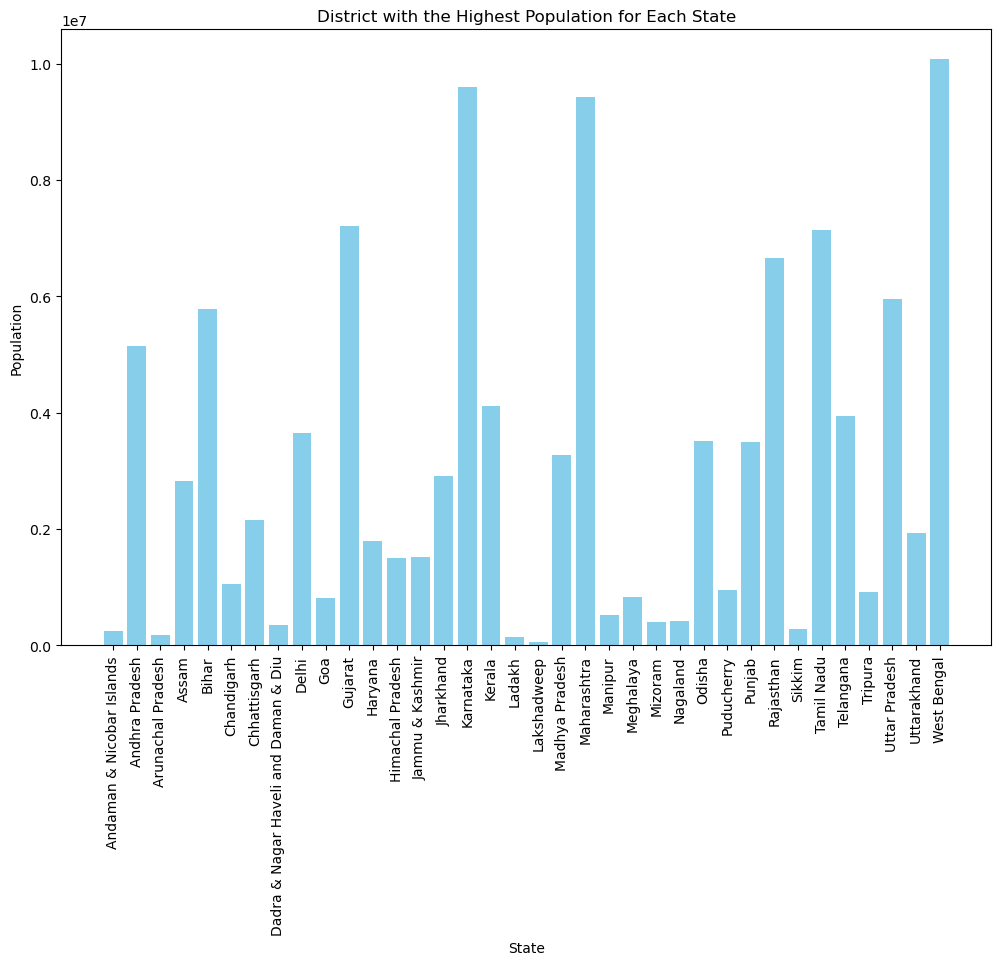

In [96]:
# Plotting the district with the highest population for each state
plt.figure(figsize=(12, 8))
plt.bar(top_district_per_state['State'], top_district_per_state['Population'], color='skyblue')
plt.title("District with the Highest Population for Each State")
plt.xlabel('State')
plt.ylabel('Population')
plt.xticks(rotation=90)
plt.show()

# Calculate the Average Transaction Value (ATV) for Each State

In [98]:
# Group by state and calculate the average transaction value (ATV)
state_atv = state_txn_users.groupby('State')['ATV (INR)'].mean().reset_index()

# Display the results
print(state_atv)

                                   State    ATV (INR)
0              Andaman & Nicobar Islands  3159.266422
1                         Andhra Pradesh  1748.091476
2                      Arunachal Pradesh  2638.323985
3                                  Assam  2008.495656
4                                  Bihar  2023.316978
5                             Chandigarh  2113.797075
6                           Chhattisgarh  1650.818617
7   Dadra & Nagar Haveli and Daman & Diu  1487.395599
8                                  Delhi  1589.839307
9                                    Goa  1895.258549
10                               Gujarat  1696.101220
11                               Haryana  1831.840325
12                      Himachal Pradesh  1825.338700
13                       Jammu & Kashmir  2508.506029
14                             Jharkhand  1632.342997
15                             Karnataka  1517.392249
16                                Kerala  1671.443173
17                          

In [99]:
# Identify the Top 5 States with the Highest ATV and the Top 5 States with the Lowest ATV
# Sort by ATV in descending order for the top 5 states with the highest ATV
top_5_atv = state_atv.sort_values('ATV (INR)', ascending=False).head(5)
print("Top 5 States with Highest ATV:")
print(top_5_atv)

# Sort by ATV in ascending order for the top 5 states with the lowest ATV
bottom_5_atv = state_atv.sort_values('ATV (INR)', ascending=True).head(5)
print("Top 5 States with Lowest ATV:")
print(bottom_5_atv)

Top 5 States with Highest ATV:
                        State    ATV (INR)
17                     Ladakh  3408.222984
0   Andaman & Nicobar Islands  3159.266422
23                    Mizoram  2927.517802
18                Lakshadweep  2776.118701
2           Arunachal Pradesh  2638.323985
Top 5 States with Lowest ATV:
                                   State    ATV (INR)
35                           West Bengal  1373.600590
25                                Odisha  1428.137367
7   Dadra & Nagar Haveli and Daman & Diu  1487.395599
20                           Maharashtra  1516.361820
15                             Karnataka  1517.392249


# Analyze App Usage Trends

In [101]:
# Calculate the Total Number of App Opens Over the Years and Quarters for Each State
# Group by state, year, and quarter to sum the app opens
app_usage_trends = state_txn_users.groupby(['State', 'Year', 'Quarter'])['App Opens'].sum().reset_index()

# Display the results
print(app_usage_trends)

                         State  Year  Quarter  App Opens
0    Andaman & Nicobar Islands  2018        1          0
1    Andaman & Nicobar Islands  2018        2          0
2    Andaman & Nicobar Islands  2018        3          0
3    Andaman & Nicobar Islands  2018        4          0
4    Andaman & Nicobar Islands  2019        1          0
..                         ...   ...      ...        ...
499                West Bengal  2020        2  198589332
500                West Bengal  2020        3  246554831
501                West Bengal  2020        4  291721919
502                West Bengal  2021        1  316832674
503                West Bengal  2021        2  275341466

[504 rows x 4 columns]


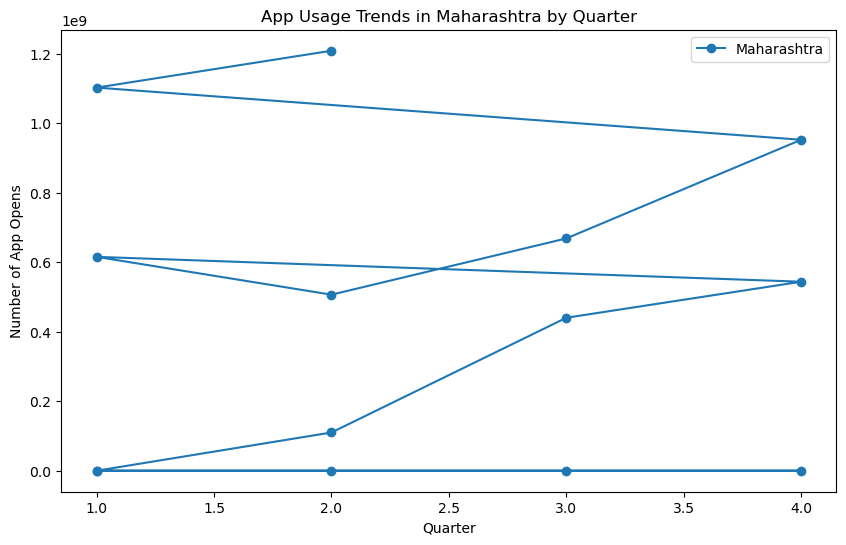

In [102]:
#  Identify Trends in App Usage by Creating a Line Plot for a Selected State
# We’ll create a line plot to identify the trends in app usage for a specific state
# Select a state to visualize app usage trends
state = 'Maharashtra'  # Example: Maharashtra

# Filter data for the selected state
state_app_usage = app_usage_trends[app_usage_trends['State'] == state]

# Plot the trends
plt.figure(figsize=(10, 6))
plt.plot(state_app_usage['Quarter'], state_app_usage['App Opens'], marker='o', label=state)
plt.title(f"App Usage Trends in {state} by Quarter")
plt.xlabel('Quarter')
plt.ylabel('Number of App Opens')
plt.legend()
plt.show()

# Distribution of Transaction Types

In [104]:
#  Create a Bar Chart Showing the Distribution of Different Transaction Types for Each State for the Most Recent Quarter

In [105]:
# Get the most recent quarter
most_recent_quarter = state_txn_split['Quarter'].max()

# Filter data for the most recent quarter
recent_quarter_data = state_txn_split[state_txn_split['Quarter'] == most_recent_quarter]

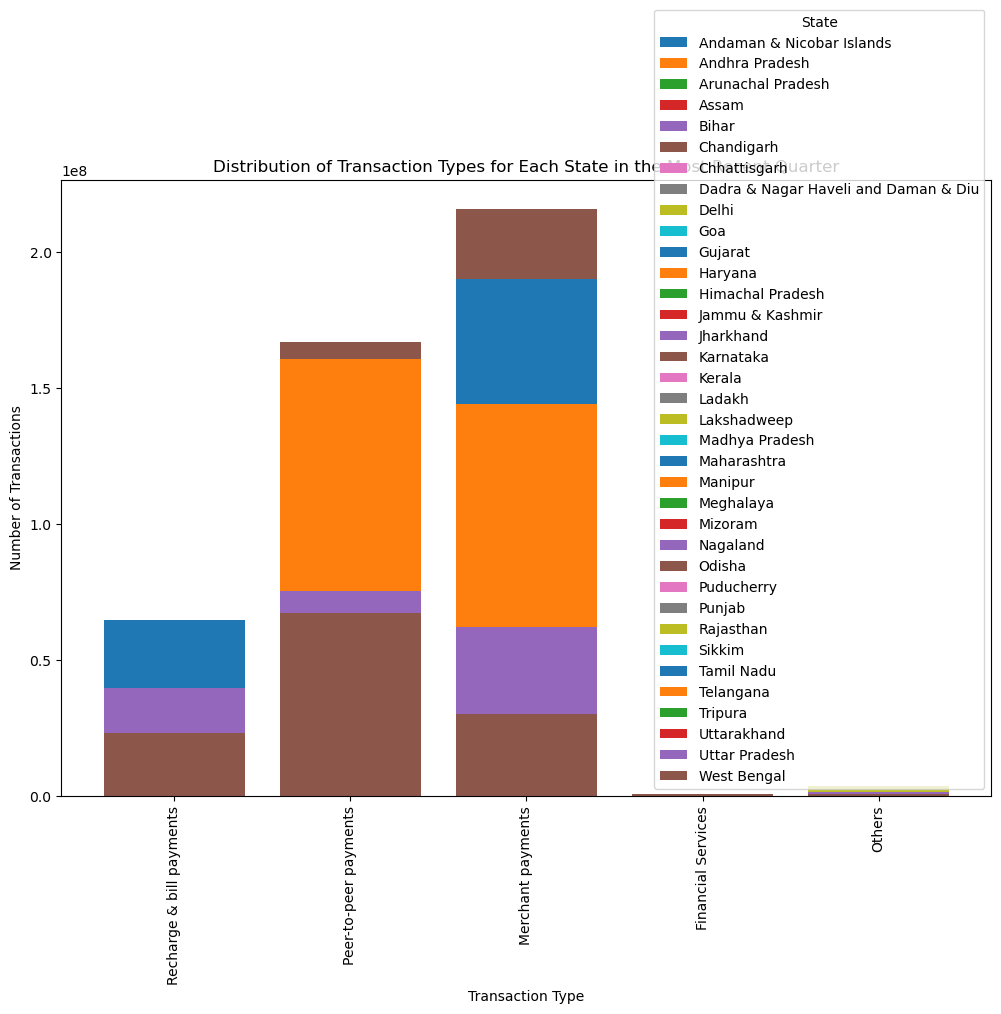

In [106]:
# Plot a bar chart showing the distribution of transaction types by state
plt.figure(figsize=(12, 8))
for state in recent_quarter_data['State'].unique():
    state_data = recent_quarter_data[recent_quarter_data['State'] == state]
    plt.bar(state_data['Transaction Type'], state_data['Transactions'], label=state)

plt.title("Distribution of Transaction Types for Each State in the Most Recent Quarter")
plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.legend(title="State")
plt.show()

# Find Unique Mapping Between District Name and District Code

In [108]:
# Extract unique district name and district code mappings
district_mapping = district_demographics[['District', 'Code']].drop_duplicates()

# Display the result
print(district_mapping)

          District  Code
0        Anantapur  AP01
1         Chittoor  AP02
2    East Godavari  AP03
3           Guntur  AP04
4              YSR  AP13
..             ...   ...
737     West Delhi  DL11
738       Karaikal  PY01
739           Mahé  PY02
740     Puducherry  PY03
741          Yanam  PY04

[742 rows x 2 columns]


In [109]:
# Create a CSV File Containing the Unique District Name and District Code Mappings
district_mapping.to_csv('district_mapping.csv', index=False)

# 🔍 Task 3: Data Quality check

In [111]:
# Aggregate district-level data to state-level
district_agg = district_txn_users.groupby(['State', 'Year', 'Quarter']).agg({
    'Transactions': 'sum',
    'Amount (INR)': 'sum',
    'Registered Users': 'sum'
}).reset_index()


In [112]:
# Prepare state-level data for comparison
state_subset = state_txn_users[['State', 'Year', 'Quarter', 'Transactions', 'Amount (INR)', 'Registered Users']]

In [113]:
# Merge aggregated district-level data with state-level data
comparison_df = pd.merge(
    district_agg,
    state_subset,
    on=['State', 'Year', 'Quarter'],
    suffixes=('_District', '_State')
)

In [114]:
# Identify discrepancies between the two
discrepancies = comparison_df[
    (comparison_df['Transactions_District'] != comparison_df['Transactions_State']) |
    (comparison_df['Amount (INR)_District'] != comparison_df['Amount (INR)_State']) |
    (comparison_df['Registered Users_District'] != comparison_df['Registered Users_State'])
]

In [115]:
# Display discrepancies
if discrepancies.empty:
    print("All values match between district and state level data.")
else:
    print("Discrepancies found between district-level and state-level data:")
    display(discrepancies)


Discrepancies found between district-level and state-level data:


,State,Year,Quarter,Transactions_District,Amount (INR)_District,Registered Users_District,Transactions_State,Amount (INR)_State,Registered Users_State
0,Andaman & Nicobar Islands,2018,1,6658,1.463176e+07,6740,6658,1.463176e+07,6740
1,Andaman & Nicobar Islands,2018,2,11340,2.833854e+07,9405,11340,2.833854e+07,9405
2,Andaman & Nicobar Islands,2018,3,16265,5.555747e+07,12149,16265,5.555747e+07,12149
3,Andaman & Nicobar Islands,2018,4,23758,9.054834e+07,15222,23758,9.054834e+07,15222
5,Andaman & Nicobar Islands,2019,2,33689,1.202547e+08,21731,33689,1.202547e+08,21731
...,...,...,...,...,...,...,...,...,...
499,West Bengal,2020,2,57676797,1.000994e+11,13222022,57676797,1.000994e+11,13222022
500,West Bengal,2020,3,79954504,1.568134e+11,14448366,79954504,1.568134e+11,14448366
501,West Bengal,2020,4,100340645,1.991655e+11,15662093,100340645,1.991655e+11,15662093
502,West Bengal,2021,1,118254052,2.429372e+11,16808799,118254052,2.429372e+11,16808799


In [116]:
# Export discrepancies as Excel or CSV for review
discrepancies.to_excel("State_District_Discrepancies.xlsx", index=False)

# 🔍 Task 4:Data Merging and Advanced Analysis

# Ratio of Users to Population by State

In [119]:
# Step 1: Aggregate population by state
state_population = district_demographics.groupby('State')['Population'].sum().reset_index()

# Step 2: Merge with state_txn_users (filter to latest data for consistency)
latest_year = state_txn_users['Year'].max()
latest_quarter = state_txn_users[state_txn_users['Year'] == latest_year]['Quarter'].max()
latest_data = state_txn_users[(state_txn_users['Year'] == latest_year) & (state_txn_users['Quarter'] == latest_quarter)]

merged_state_data = pd.merge(latest_data, state_population, on='State', how='left')

# Step 3: Calculate user-to-population ratio
merged_state_data['User to Population Ratio'] = merged_state_data['Registered Users'] / merged_state_data['Population']

# Display table
user_population_ratio_table = merged_state_data[['State', 'Registered Users', 'Population', 'User to Population Ratio']]
print(user_population_ratio_table.sort_values(by='User to Population Ratio', ascending=False))

                                   State  Registered Users  Population  \
8                                  Delhi          11182699    16787941   
7   Dadra & Nagar Haveli and Daman & Diu            344994      586956   
31                             Telangana          18306880    36366570   
5                             Chandigarh            448572     1055450   
15                             Karnataka          25751023    60965960   
9                                    Goa            609106     1457723   
11                               Haryana          10530594    25855357   
1                         Andhra Pradesh          19620905    49378776   
20                           Maharashtra          39664697   112378989   
33                           Uttarakhand           3004040    10116752   
26                            Puducherry            369961     1247953   
29                                Sikkim            171740      607688   
28                             Rajasth

# Create a column chart depicting the ratio of users to population by state

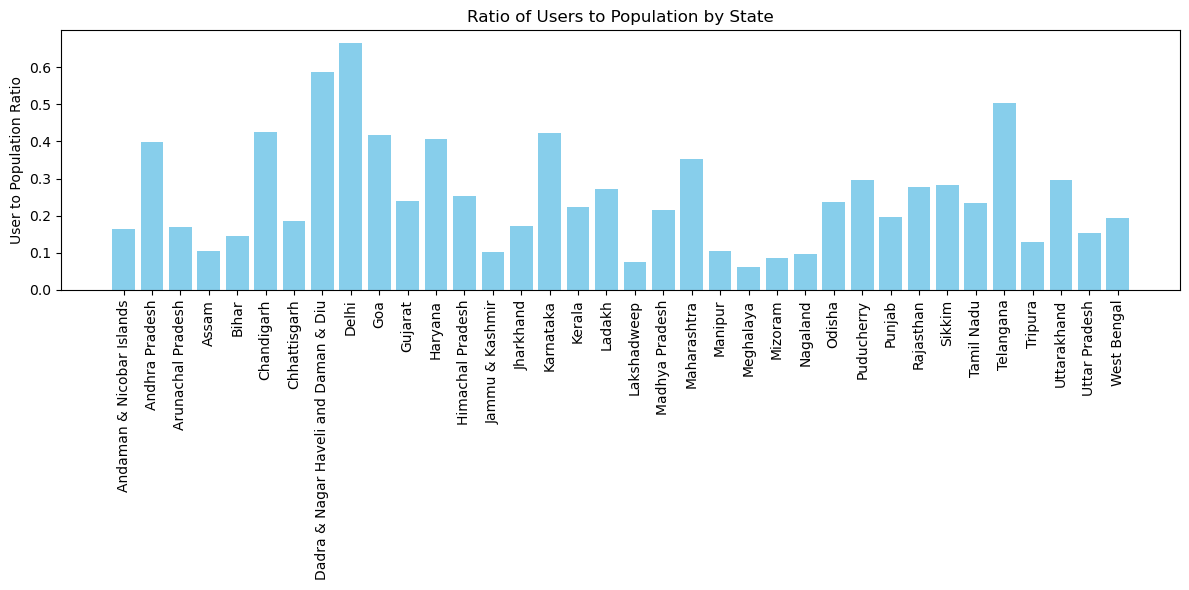

In [121]:
# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(user_population_ratio_table['State'], user_population_ratio_table['User to Population Ratio'], color='skyblue')
plt.xticks(rotation=90)
plt.title('Ratio of Users to Population by State')
plt.ylabel('User to Population Ratio')
plt.tight_layout()
plt.show()

# Correlate population density with transaction volume

In [123]:
# Merge district-level transaction data with demographics
district_merged = pd.merge(district_txn_users, district_demographics, on=['State', 'District', 'Code'], how='inner')
# Correlation between density and transaction amount
# Calculate correlation
correlation = district_merged['Density'].corr(district_merged['Amount (INR)'])
print("Correlation between Population Density and Transaction Volume:", correlation)

Correlation between Population Density and Transaction Volume: 0.33679451663686094


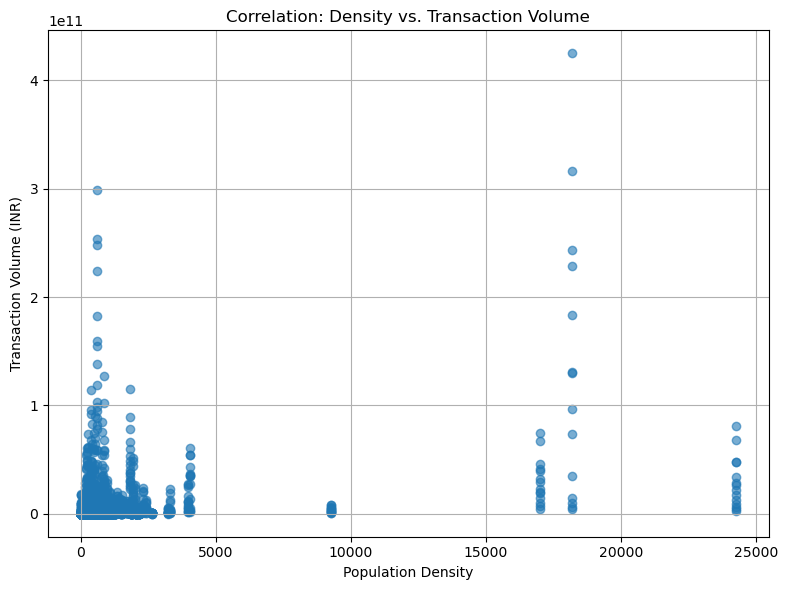

In [124]:
# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(district_merged['Density'], district_merged['Amount (INR)'], alpha=0.6)
plt.xlabel("Population Density")
plt.ylabel("Transaction Volume (INR)")
plt.title("Correlation: Density vs. Transaction Volume")
plt.grid(True)
plt.tight_layout()
plt.show()

# Average transaction amount per user by state

In [126]:
state_txn_users['Avg_Transaction_Per_User'] = state_txn_users['Amount (INR)'] / state_txn_users['Registered Users']
avg_txn_by_state = state_txn_users.sort_values(['Year', 'Quarter'], ascending=False).drop_duplicates('State')

# Show result
avg_txn_by_state[['State', 'Amount (INR)', 'Registered Users', 'Avg_Transaction_Per_User']]

,State,Amount (INR),Registered Users,Avg_Transaction_Per_User
13,Andaman & Nicobar Islands,8.991470e+08,62095,14480.183849
27,Andhra Pradesh,8.507375e+11,19620905,43358.728821
41,Arunachal Pradesh,4.456426e+09,270572,16470.387243
55,Assam,5.919247e+10,3617056,16364.820831
69,Bihar,3.745803e+11,14972134,25018.494704
83,Chandigarh,8.417674e+09,448572,18765.491248
97,Chhattisgarh,7.872877e+10,4837055,16276.178637
111,Dadra & Nagar Haveli and Daman & Diu,3.157668e+09,344994,9152.821387
125,Delhi,2.819411e+11,11182699,25212.258479
139,Goa,8.012854e+09,609106,13155.105330


In [127]:
# Top 5 and Bottom 5 states
# Top 5
top5 = avg_txn_by_state.sort_values('Avg_Transaction_Per_User', ascending=False).head(5)
print("Top 5 States by Avg Transaction per User:")
print(top5[['State', 'Avg_Transaction_Per_User']])

# Bottom 5
bottom5 = avg_txn_by_state.sort_values('Avg_Transaction_Per_User', ascending=True).head(5)
print("\nBottom 5 States by Avg Transaction per User:")
print(bottom5[['State', 'Avg_Transaction_Per_User']])

Top 5 States by Avg Transaction per User:
              State  Avg_Transaction_Per_User
447       Telangana              56151.475991
27   Andhra Pradesh              43358.728821
223       Karnataka              32538.014169
405       Rajasthan              29592.919713
279  Madhya Pradesh              26692.334423

Bottom 5 States by Avg Transaction per User:
                                    State  Avg_Transaction_Per_User
265                           Lakshadweep               5593.027708
461                               Tripura               7345.403632
111  Dadra & Nagar Haveli and Daman & Diu               9152.821387
181                      Himachal Pradesh               9463.112800
237                                Kerala              10008.896399


# Device brand usage ratio

In [129]:
# Merge device and user data
# Merge by State, Year, Quarter
device_merged = pd.merge(state_device_data, state_txn_users, on=['State', 'Year', 'Quarter'], how='left')

In [130]:
# Calculate ratio of users per brand to total registered users in state
device_merged['Brand_Usage_Ratio'] = device_merged['Registered Users_x'] / device_merged['Registered Users_y']

# Display
device_merged[['State', 'Brand', 'Registered Users_x', 'Registered Users_y', 'Brand_Usage_Ratio']].head(10)

,State,Brand,Registered Users_x,Registered Users_y,Brand_Usage_Ratio
0,Andaman & Nicobar Islands,Xiaomi,1665,6740,0.247033
1,Andaman & Nicobar Islands,Samsung,1445,6740,0.214392
2,Andaman & Nicobar Islands,Vivo,982,6740,0.145697
3,Andaman & Nicobar Islands,Oppo,501,6740,0.074332
4,Andaman & Nicobar Islands,OnePlus,332,6740,0.049258
5,Andaman & Nicobar Islands,Realme,316,6740,0.046884
6,Andaman & Nicobar Islands,Apple,229,6740,0.033976
7,Andaman & Nicobar Islands,Motorola,226,6740,0.033531
8,Andaman & Nicobar Islands,Lenovo,202,6740,0.029970
9,Andaman & Nicobar Islands,Huawei,158,6740,0.023442


In [131]:
#  Plot bar chart (example: for a specific state)

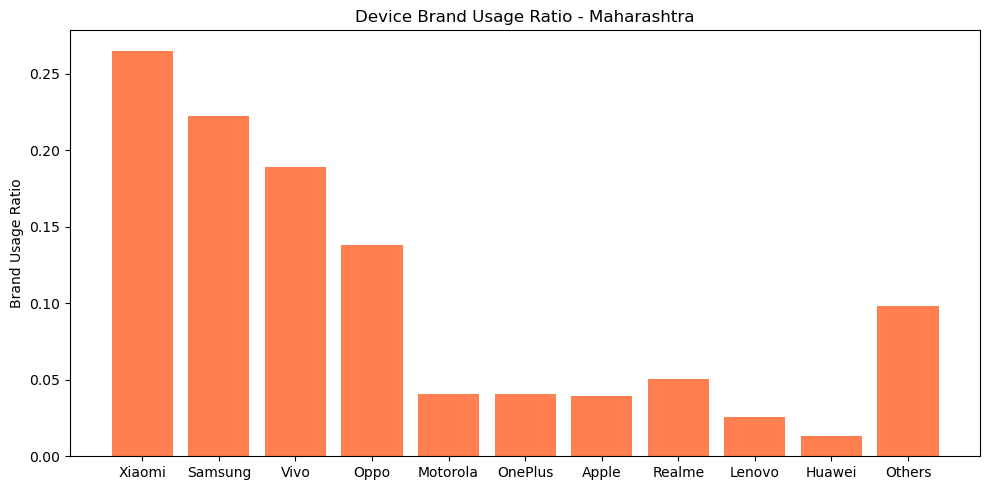

In [132]:
# Filter for one state (e.g., 'Maharashtra') to avoid too many bars
state_sample = device_merged[device_merged['State'] == 'Maharashtra']

# Plot
plt.figure(figsize=(10,5))
plt.bar(state_sample['Brand'], state_sample['Brand_Usage_Ratio'], color='coral')
#plt.xticks(rotation=45)
plt.ylabel("Brand Usage Ratio")
plt.title("Device Brand Usage Ratio - Maharashtra")
plt.tight_layout()
plt.show()

# 🔍 Task 5:Data Visualization

# Line Plot – Total Transactions and Amount Over Time for a Selected State

In [ ]:
selected_state = 'Maharashtra'
state_time_data = state_txn_users[state_txn_users['State'] == selected_state].copy()  # Safe copy
# Create Year_Quarter column to order the timeline
state_time_data['Year_Quarter'] = state_time_data['Year'].astype(str) + ' Q' + state_time_data['Quarter'].astype(str)
print(state_time_data)

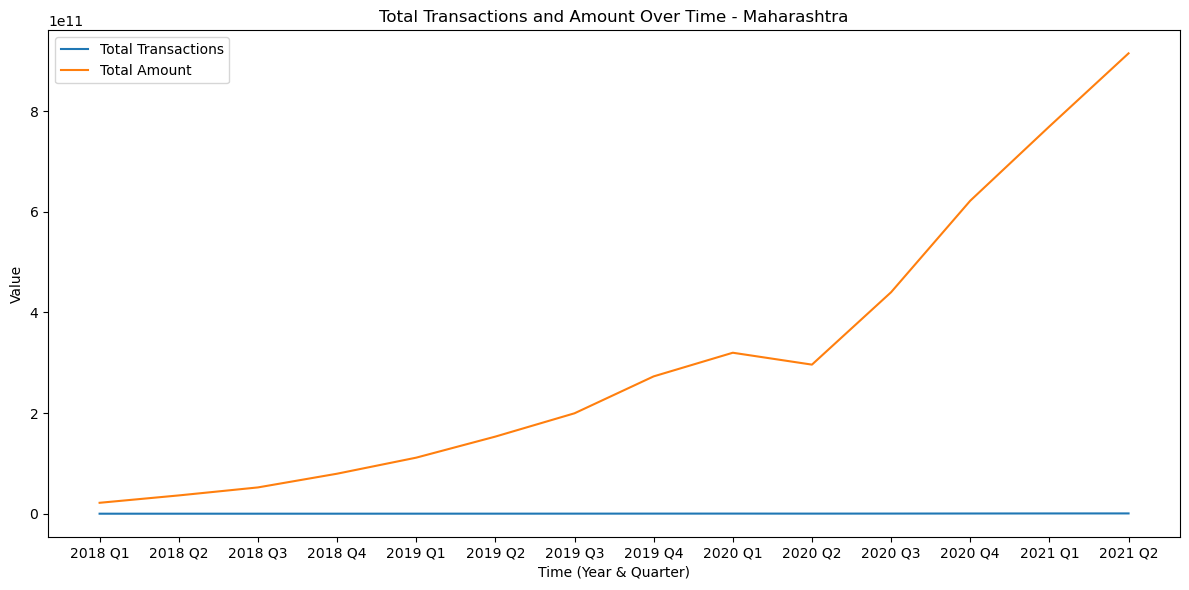

In [141]:
# Plot line chart
plt.figure(figsize=(12, 6))

# Plot total transactions
sns.lineplot(data=state_time_data, x='Year_Quarter', y='Transactions', label='Total Transactions')

# Plot total amount
sns.lineplot(data=state_time_data, x='Year_Quarter', y='Amount (INR)', label='Total Amount')

#plt.xticks(rotation=45)
plt.title(f"Total Transactions and Amount Over Time - {selected_state}")
plt.xlabel("Time (Year & Quarter)")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()

# Pie Chart – Distribution of Transaction Types for a State and Quarter

In [143]:
# Filter data (e.g., Karnataka, Q1 2021)
selected_state = 'Karnataka'
selected_year = 2021
selected_quarter = 1

txn_split_filtered = state_txn_split[
    (state_txn_split['State'] == selected_state) &
    (state_txn_split['Year'] == selected_year) &
    (state_txn_split['Quarter'] == selected_quarter)
]

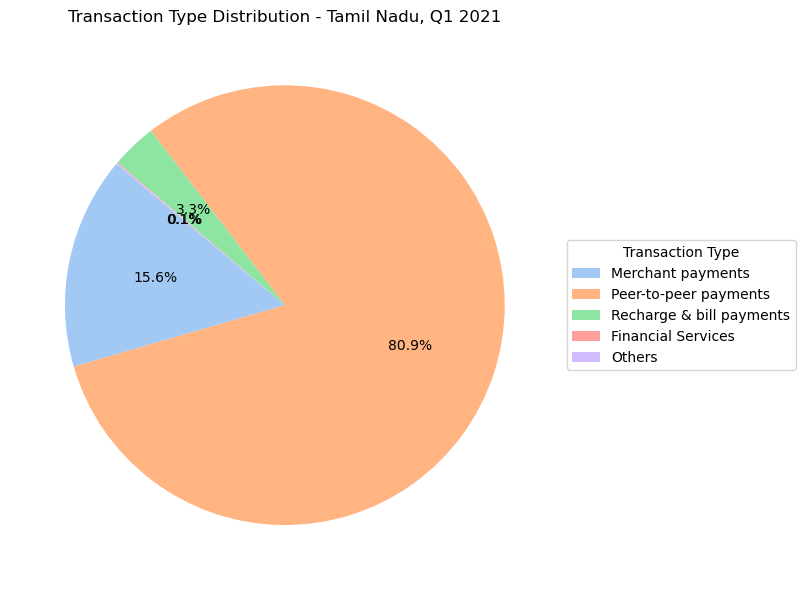

In [185]:
plt.figure(figsize=(8, 6))
patches, texts, autotexts = plt.pie(
    txn_split_filtered['Amount (INR)'],
    labels=None,  # Remove labels from inside
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel')
)

# Add legend with labels outside
plt.legend(patches, txn_split_filtered['Transaction Type'], title="Transaction Type", bbox_to_anchor=(1, 0.5), loc="center left")

plt.title(f"Transaction Type Distribution - {selected_state}, Q{selected_quarter} {selected_year}")
plt.tight_layout()
plt.show()

# Bar Plot – Population Density of Districts in a Selected State

In [147]:
# Filter the district_demographics dataset
selected_state = 'Tamil Nadu'
districts_state = district_demographics[district_demographics['State'] == selected_state]

C:\Users\saner\AppData\Local\Temp\ipykernel_21464\1245403953.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=districts_state, x='District', y='Density', palette='viridis')


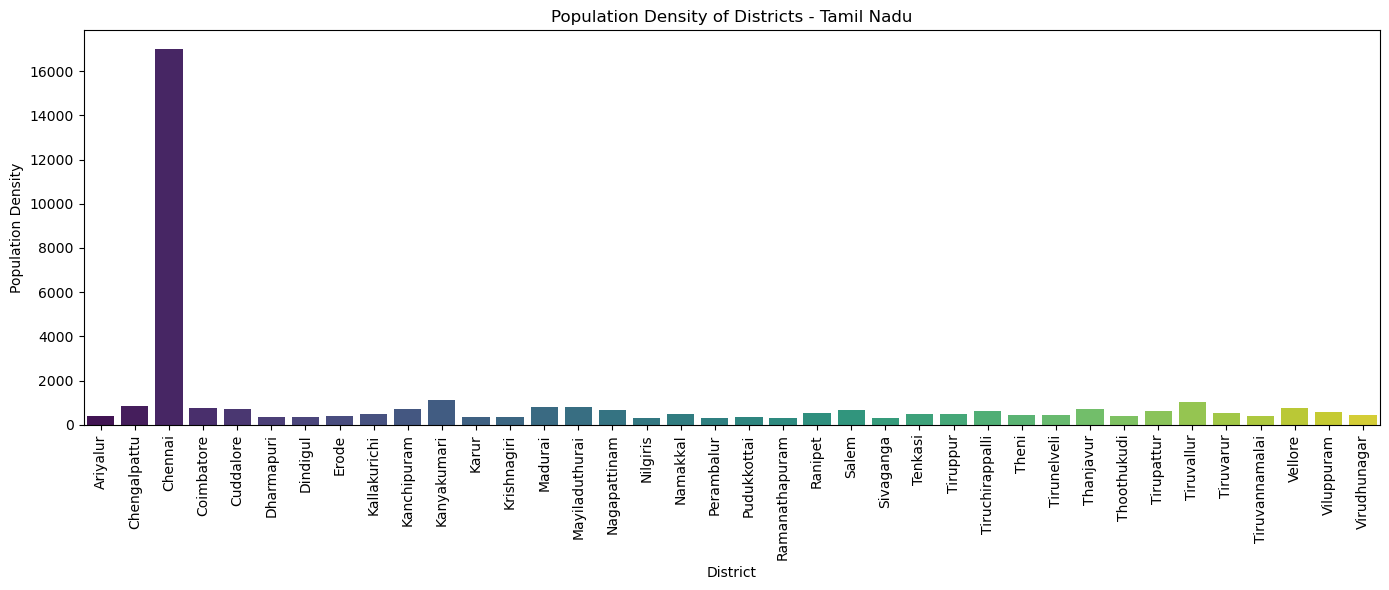

In [149]:
# Plot bar chart
plt.figure(figsize=(14, 6))
sns.barplot(data=districts_state, x='District', y='Density', palette='viridis')

plt.xticks(rotation=90)
plt.title(f"Population Density of Districts - {selected_state}")
plt.ylabel("Population Density")
plt.xlabel("District")
plt.tight_layout()
plt.show()

# 🔍 Task 6: Insights and Conclusions

#  Identify Trends or Patterns in Transaction Data

In [158]:
# Grouping state-wise transaction data by year
yearly_trend = state_txn_users.groupby('Year')[['Transactions', 'Amount (INR)']].sum().reset_index()

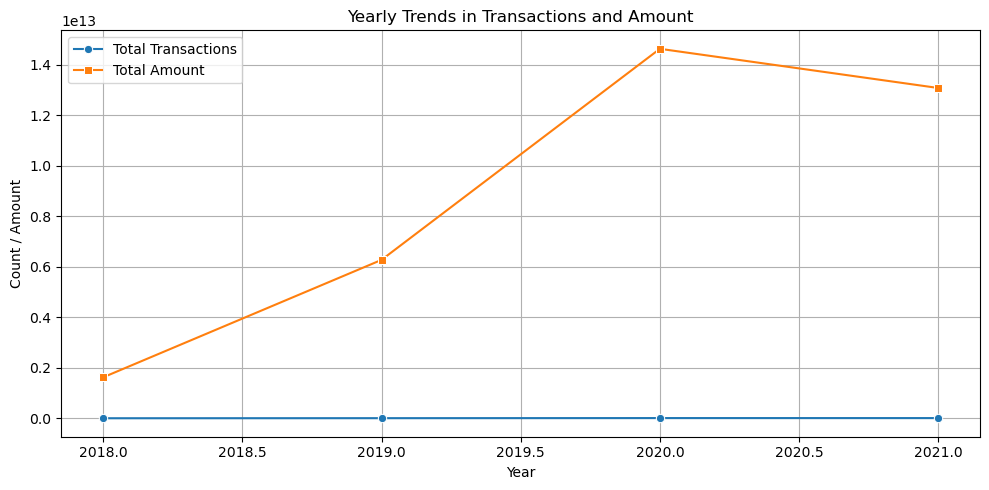

In [164]:
# Create line plots to visualize trends
plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_trend, x='Year', y='Transactions', label='Total Transactions', marker='o')
sns.lineplot(data=yearly_trend, x='Year', y='Amount (INR)', label='Total Amount', marker='s')

plt.title("Yearly Trends in Transactions and Amount")
plt.xlabel("Year")
plt.ylabel("Count / Amount")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [166]:
print("""
Insight:
- The number of digital transactions and total amount increased steadily from 2018 to 2021.
- Major growth observed in 2020 and 2021, possibly due to increased digital adoption during the COVID-19 pandemic.
""")


Insight:
- The number of digital transactions and total amount increased steadily from 2018 to 2021.
- Major growth observed in 2020 and 2021, possibly due to increased digital adoption during the COVID-19 pandemic.



# Correlate Demographic Data with Transaction Data

In [169]:
# Merge district transaction data with demographics
merged_data = pd.merge(district_txn_users, district_demographics, on=['State', 'District'])

# Drop missing values if any
merged_data_clean = merged_data.dropna()

In [173]:
# Calculate correlation
correlation = merged_data_clean[['Density', 'Transactions']].corr()
print("Correlation between Population Density and Total Transactions:")
print(correlation)

Correlation between Population Density and Total Transactions:
               Density  Transactions
Density       1.000000      0.307676
Transactions  0.307676      1.000000


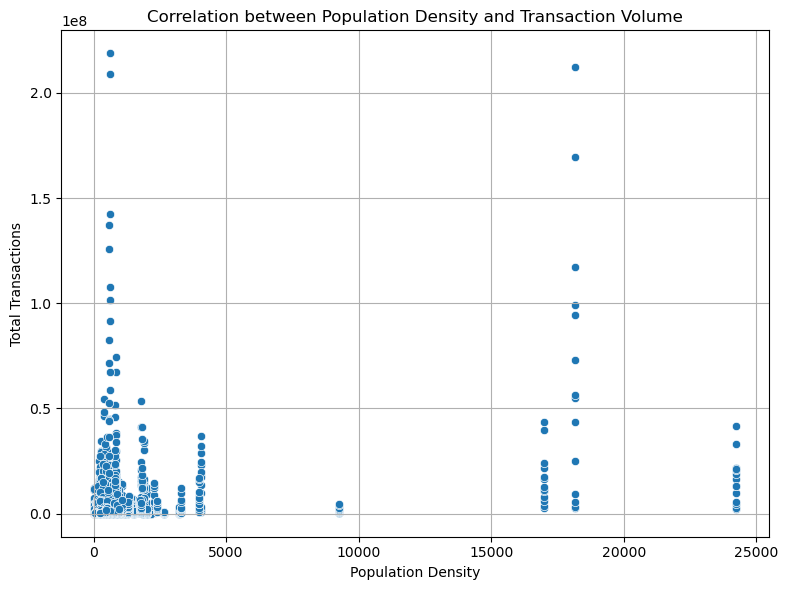

In [177]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_data_clean, x='Density', y='Transactions')
plt.title("Correlation between Population Density and Transaction Volume")
plt.xlabel("Population Density")
plt.ylabel("Total Transactions")
plt.grid(True)
plt.tight_layout()
plt.show()

In [179]:
print("""
 Summary of Key Insights:

1. Digital transaction volume and amount have increased consistently from 2018 to 2021.
2. States with higher population densities tend to show higher transaction volumes, indicating digital penetration in urban areas.
3. Maharashtra, Karnataka, and Tamil Nadu are among the top contributors in total transaction amount.
4. Device usage data shows that brands like Xiaomi and Samsung dominate digital payment users.

 Recommendations:

1. Focus marketing and financial literacy programs in low-density or rural areas to improve digital inclusion.
2. Customize features for users based on device brands to enhance app performance and reach.
3. Monitor trends post-2021 to see if digital habits sustained beyond pandemic influence.

""")


 Summary of Key Insights:

1. Digital transaction volume and amount have increased consistently from 2018 to 2021.
2. States with higher population densities tend to show higher transaction volumes, indicating digital penetration in urban areas.
3. Maharashtra, Karnataka, and Tamil Nadu are among the top contributors in total transaction amount.
4. Device usage data shows that brands like Xiaomi and Samsung dominate digital payment users.

 Recommendations:

1. Focus marketing and financial literacy programs in low-density or rural areas to improve digital inclusion.
2. Customize features for users based on device brands to enhance app performance and reach.
3. Monitor trends post-2021 to see if digital habits sustained beyond pandemic influence.


